# Insurance Data Analysis

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('insurance.csv')

### EDA

In [66]:
df.shape

(1338, 7)

In [67]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [69]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [70]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [71]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

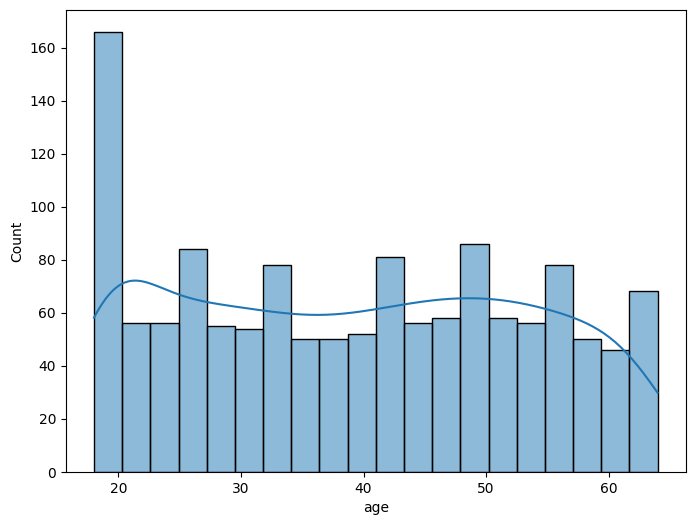

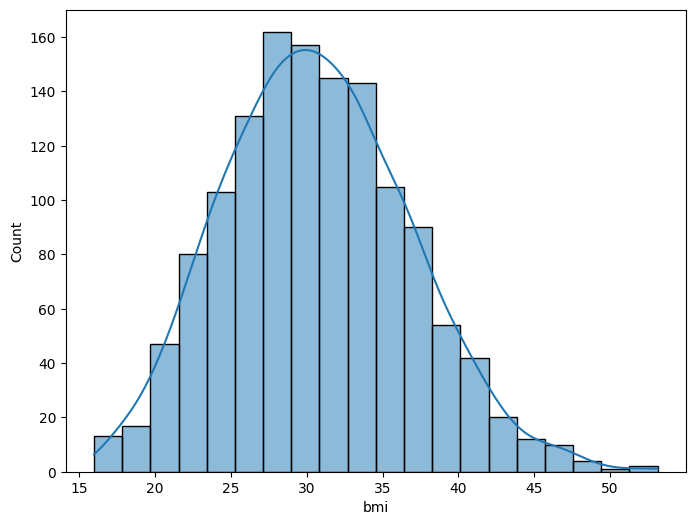

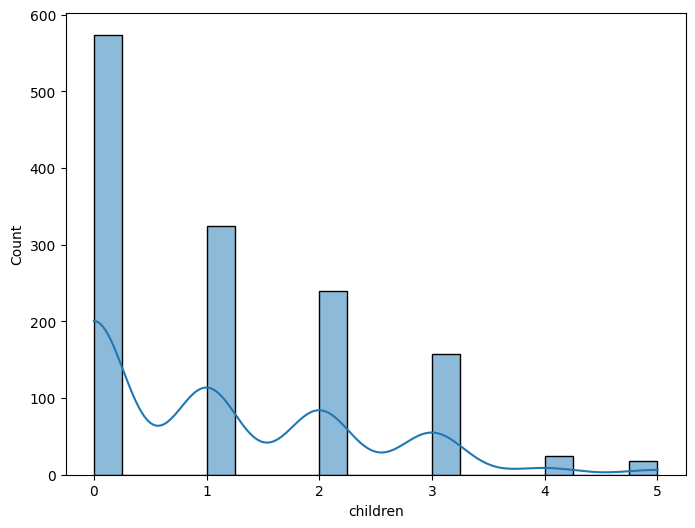

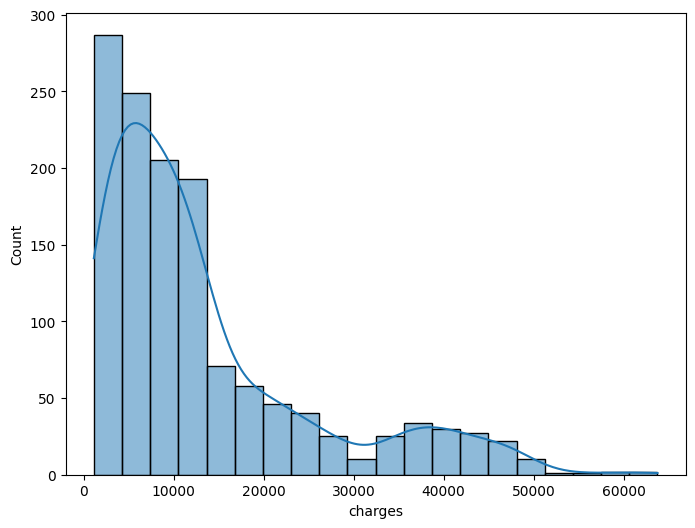

In [72]:
nums_columns = ['age', 'bmi', 'children', 'charges']

for col in nums_columns:
    plt.figure(figsize=(8,6))
    sns.histplot(df[col], bins=20, edgecolor='black', kde=True)
    plt.show()


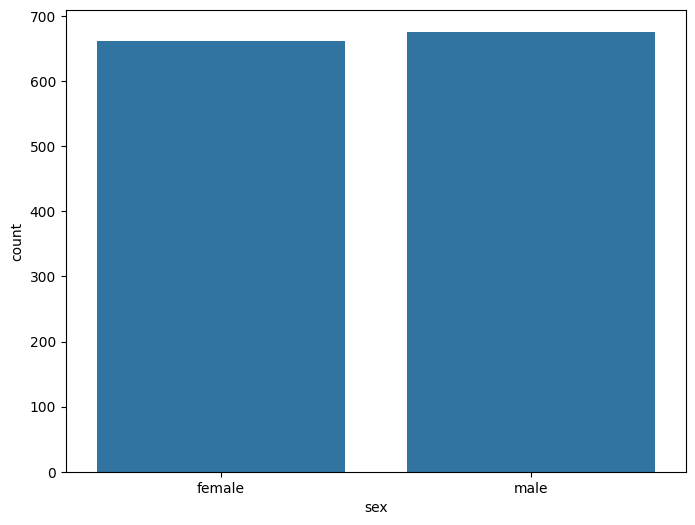

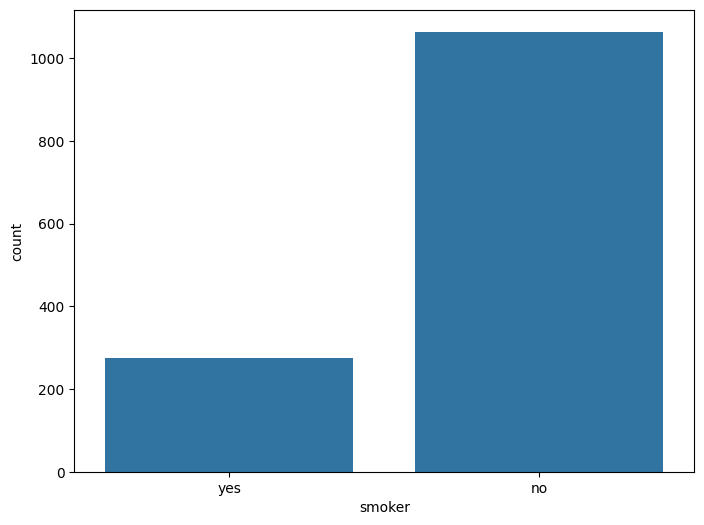

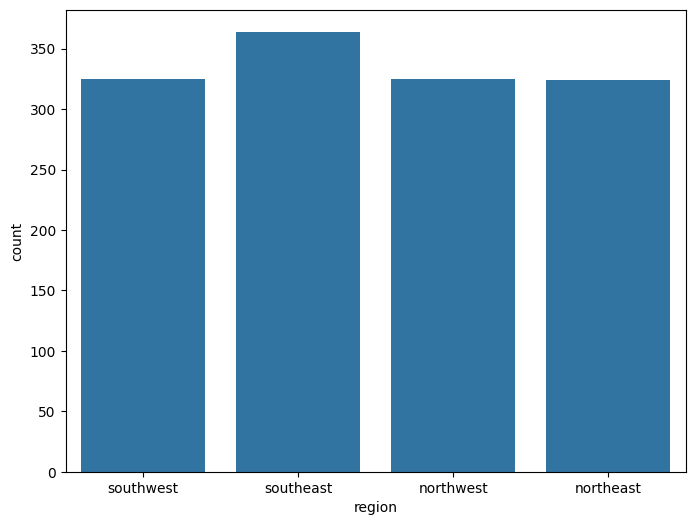

In [73]:
cat_columns = ['sex', 'smoker', 'region']
for col in cat_columns:
    plt.figure(figsize=(8,6))
    sns.countplot(x=df[col])

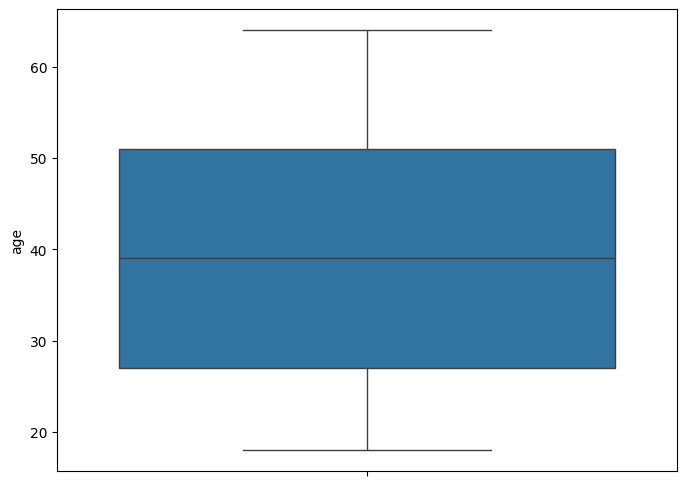

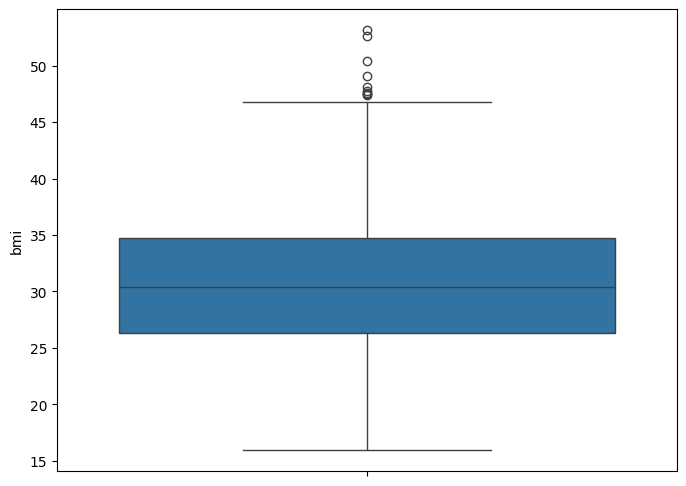

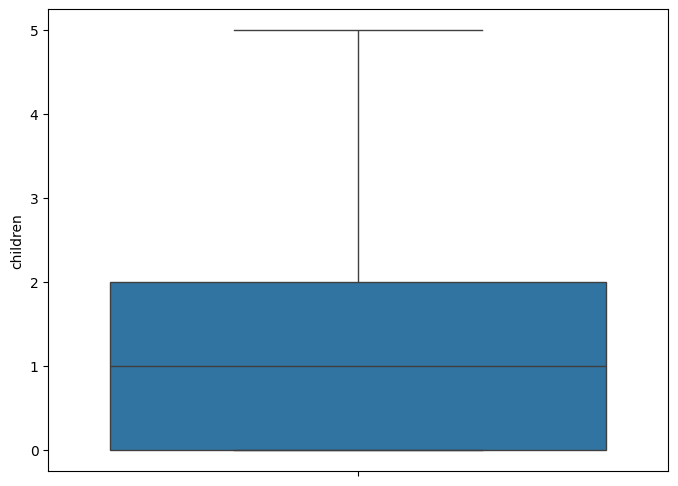

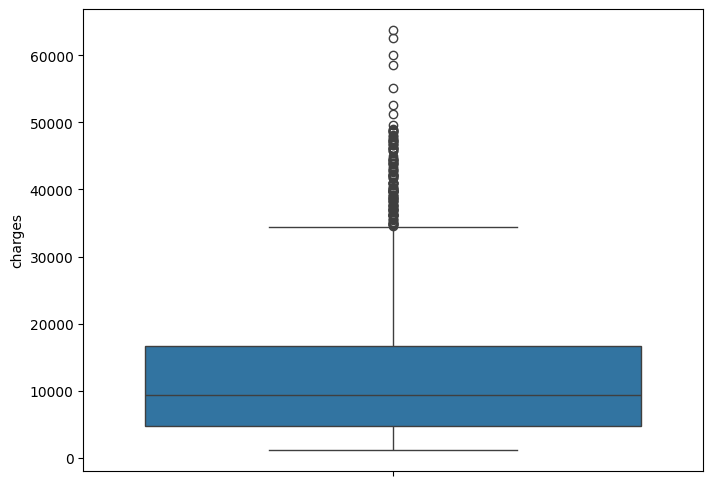

In [74]:
for col in nums_columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(df[col])

### Data cleaning and Preprocessing

In [75]:
new_df = df.copy()
new_df.shape

(1338, 7)

In [76]:
new_df.drop_duplicates(inplace=True)
new_df.shape

(1337, 7)

In [77]:
new_df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

#### Convert the all qualitative variables into numaric variables

In [78]:
new_df['sex']= new_df['sex'].map({'male':1, 'female':0})

In [79]:
new_df['smoker']= new_df['smoker'].map({'yes':1, 'no':0})

In [80]:
new_df.rename(columns={
    'sex':'is_male',
    'smoker':'is_smoker'
}, inplace=True)
new_df.head()

,age,is_male,bmi,children,is_smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


#### Implement One hot encoding for region

In [81]:
new_df = pd.get_dummies(
    new_df,
    columns=['region'],
      drop_first=True
)

In [82]:
new_df.astype(int)

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,1
1,18,1,33,1,0,1725,0,1,0
2,28,1,33,3,0,4449,0,1,0
3,33,1,22,0,0,21984,1,0,0
4,32,1,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0
1334,18,0,31,0,0,2205,0,0,0
1335,18,0,36,0,0,1629,0,1,0
1336,21,0,25,0,0,2007,0,0,1


### Feature Engineering and Extraction

In [83]:
# Making the different category for BMI

new_df['bmi_category'] = pd.cut(
    new_df['bmi'],
    bins=[0, 18.5, 24.9, 49.9, float("inf")],
    labels=['UnderWeight', 'Normal', 'OverWeight', 'Obsse']
)


In [84]:
new_df.head()

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,0,27.900,0,1,16884.92400,False,False,True,OverWeight
1,18,1,33.770,1,0,1725.55230,False,True,False,OverWeight
2,28,1,33.000,3,0,4449.46200,False,True,False,OverWeight
3,33,1,22.705,0,0,21984.47061,True,False,False,Normal
4,32,1,28.880,0,0,3866.85520,True,False,False,OverWeight


In [85]:
new_df = pd.get_dummies(
    new_df,
    columns=['bmi_category'],
      drop_first=True
)

In [86]:
new_df.astype(int)

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_OverWeight,bmi_category_Obsse
0,19,0,27,0,1,16884,0,0,1,0,1,0
1,18,1,33,1,0,1725,0,1,0,0,1,0
2,28,1,33,3,0,4449,0,1,0,0,1,0
3,33,1,22,0,0,21984,1,0,0,1,0,0
4,32,1,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0,0,1,0
1334,18,0,31,0,0,2205,0,0,0,0,1,0
1335,18,0,36,0,0,1629,0,1,0,0,1,0
1336,21,0,25,0,0,2007,0,0,1,0,1,0


In [87]:
from sklearn.preprocessing import StandardScaler
cols = ['age', 'bmi','children' ]
scaler = StandardScaler()
new_df[cols] = scaler.fit_transform(new_df[cols])

In [88]:
new_df.head()

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_OverWeight,bmi_category_Obsse
0,-1.440418,0,-0.453160,-0.909234,1,16884.92400,False,False,True,False,True,False
1,-1.511647,1,0.509422,-0.079442,0,1725.55230,False,True,False,False,True,False
2,-0.799350,1,0.383155,1.580143,0,4449.46200,False,True,False,False,True,False
3,-0.443201,1,-1.305052,-0.909234,0,21984.47061,True,False,False,True,False,False
4,-0.514431,1,-0.292456,-0.909234,0,3866.85520,True,False,False,False,True,False


In [89]:
from scipy.stats import pearsonr

selected_features =  [
       'age', 'is_male', 'bmi',
       'children', 'is_smoker',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_OverWeight', 'bmi_category_Obsse']

correlations = {
    feature : pearsonr(new_df[feature],new_df['charges'])[0]
    for feature in selected_features
}

correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298308
2,bmi,0.198401
9,bmi_category_OverWeight,0.115623
6,region_southeast,0.073578
3,children,0.067389
1,is_male,0.058044
10,bmi_category_Obsse,0.010793
5,region_northwest,-0.038695
7,region_southwest,-0.043637


In [90]:
cat_features =  [
        'is_male', 'is_smoker',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_OverWeight', 'bmi_category_Obsse']

In [91]:
from scipy.stats import chi2_contingency

alpha = 0.05

new_df['charges_bin'] = pd.qcut(new_df['charges'], q=4, labels=False)
chi2_result = {}
for col in cat_features:
    contingency = pd.crosstab(new_df[col], new_df['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (keep)' if p_val < alpha else 'Accept Null (Drop)'
    chi2_result[col] = {
        'chi2_statistics':chi2_stat,
        'p_value':p_val,
        'Decision':decision
    }

chi2_df = pd.DataFrame(chi2_result).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistics,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (keep)
region_southeast,15.998167,0.001135,Reject Null (keep)
is_male,10.258784,0.01649,Reject Null (keep)
bmi_category_OverWeight,7.327153,0.06217,Accept Null (Drop)
region_southwest,5.091893,0.165191,Accept Null (Drop)
bmi_category_Normal,4.263673,0.234364,Accept Null (Drop)
bmi_category_Obsse,3.663946,0.300113,Accept Null (Drop)
region_northwest,1.13424,0.768815,Accept Null (Drop)


In [92]:
final_df = new_df[['age', 'is_male', 'bmi', 'children', 'is_smoker', 'charges','region_southeast', 'bmi_category_Obsse']]
final_df

,age,is_male,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obsse
0,-1.440418,0,-0.453160,-0.909234,1,16884.92400,False,False
1,-1.511647,1,0.509422,-0.079442,0,1725.55230,True,False
2,-0.799350,1,0.383155,1.580143,0,4449.46200,True,False
3,-0.443201,1,-1.305052,-0.909234,0,21984.47061,False,False
4,-0.514431,1,-0.292456,-0.909234,0,3866.85520,False,False
...,...,...,...,...,...,...,...,...
1333,0.767704,1,0.050269,1.580143,0,10600.54830,False,False
1334,-1.511647,0,0.206053,-0.909234,0,2205.98080,False,False
1335,-1.511647,0,1.014490,-0.909234,0,1629.83350,True,False
1336,-1.297958,0,-0.797524,-0.909234,0,2007.94500,False,False


Separate the data 

In [93]:
X = final_df.drop('charges', axis=1)
y = final_df['charges']

Split the data into train and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

### Linear Regression 

In [95]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

LinearRegression()

In [98]:
y_pred = lr_model.predict(X_test)


Testing the model Accuracy

In [101]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p -1))
print(f'R2 score {r2} and Adjusted R2 score {adjusted_r2}')


R2 score 0.805505225652015 and Adjusted R2 score 0.8002688278811076


### Implement Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')

d:\coding playground\hands-on-ML\env\Lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\coding playground\hands-on-ML\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
        cached_call, estimator, *args, **routed_params.get(name).score
    )
  File "d:\coding playground\hands-on-ML\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\coding playground\hands-on-ML\env\Lib\site-packages\sklearn\utils\_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
  File "d:\coding playground\hands-on-ML\env\Lib\site-packages\sklearn\metrics\_classification.py", line 227, in 